In [127]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog4.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [128]:
df = df.drop(['Unnamed: 0'], axis=1)

In [129]:
df1 = df.replace('C-', 'C')
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [130]:
dum1 = pd.get_dummies(df1['Tm'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Tm'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,PHI,PHO,POR,SAC,SAS,SEA,TOR,UTA,VAN,WAS
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,0,0,0,0,0,0,0,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,0,0,0,0,0,0,0,0,1,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,0,0,0,0,0,0,0,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,0,0,0,0,0,0,0,0,0,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,TOR,UTA,VAN,WAS,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,0,0,0,0,2.0,0,1,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,0,0,1,0,2.6,0,1,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,0,0,0,0,1.9,0,1,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,0,0,0,0,1.9,0,0,0,1,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,0,0,0,0,2.0,0,0,0,1,0


In [132]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,TOR,UTA,VAN,WAS,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,0,0,0,0,2.0,0,1,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,0,0,1,0,2.6,0,1,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,0,0,0,0,1.9,0,1,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,0,0,0,0,1.9,0,0,0,1,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,0,0,0,0,2.0,0,0,0,1,0


In [133]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,TOR,UTA,VAN,WAS,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,0,0,0,0,2.0,0,1,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0,0,1,0,2.6,0,1,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0,0,0,0,1.9,0,1,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,0,0,0,1.9,0,0,0,1,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,0,0,0,2.0,0,0,0,1,0


In [134]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,0,1,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0,1,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0,1,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,0,0,1,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,0,0,1,0,2.3,0.8,0.6,0.4,5.1


In [135]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.786003,-1.087380,-0.266112,-0.896628,1.898169,0.532928,0.148761,1.359829,-1.354088,-1.397222,...,-0.337395,1.917412,-0.555556,-0.477283,-0.596722,2.629596,0.467853,1.553977,4.428502,1.542543
Stromile Swift,-0.985352,-0.462574,0.276099,-0.359158,1.439265,0.918528,0.533188,1.265819,-1.092405,-1.093554,...,-0.337395,1.917412,-0.555556,-0.477283,-0.596722,0.618454,-0.591562,0.789411,2.259798,-0.133994
Marcus Fizer,0.276067,0.894762,1.825275,1.396576,0.574407,2.460927,2.583468,0.118902,-1.092405,-1.093554,...,-0.337395,1.917412,-0.555556,-0.477283,-0.596722,0.988928,-0.097169,-0.230011,0.091093,0.952213
Mike Miller,-0.582771,-0.441029,-0.188654,-0.287495,0.080203,-0.315392,-0.577380,0.889781,0.216012,0.323562,...,-0.337395,-0.521536,-0.555556,2.095192,-0.596722,0.830154,0.326597,0.279700,-0.218722,1.518930
DerMarr Johnson,-1.468448,-0.268669,-0.266112,-0.287495,-0.008048,-0.700991,-1.004521,1.077800,0.739379,0.779064,...,-0.337395,-0.521536,-0.555556,2.095192,-0.596722,-0.069568,-0.309052,0.279700,0.400908,-0.086767


In [139]:
df3 = df1[0:586]
df4 = df1[586:]

In [140]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.441610,0.269956,3.296993,1.145756,3.557284,3.463487,1.643756,4.311732,-0.438196,-0.334385,...,-0.337395,1.917412,-0.555556,-0.477283,-0.596722,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
RJ Barrett,-1.307416,1.411843,2.832240,3.044815,-0.431652,2.152447,2.156326,0.212911,1.131904,1.690067,...,-0.337395,-0.521536,-0.555556,-0.477283,1.675823,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
DeAndre Hunter,-0.421739,-0.462574,-0.266112,-0.538315,0.539107,-0.238272,-0.363809,0.438534,-0.176513,-0.283773,...,-0.337395,-0.521536,-0.555556,2.095192,-0.596722,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
Darius Garland,-2.193093,-0.204034,0.818311,0.285805,1.033311,-0.084032,-0.406523,1.190612,1.524429,0.880286,...,-0.337395,-0.521536,1.800000,-0.477283,-0.596722,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
Jarrett Culver,-0.314384,0.162231,0.431017,0.572456,-0.343401,0.147328,0.148761,0.081298,0.477696,0.627230,...,-0.337395,-0.521536,-0.555556,-0.477283,1.675823,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104


In [141]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [66], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [66], axis=1)
test_x=tests[0]
test_y=tests[1]

In [142]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [143]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Sviatoslav Mykhailiuk,-0.810515,-0.238424,-0.484866,-0.838351,-0.535418
Keita Bates-Diop,0.195056,-0.450307,0.279700,0.710723,-0.110381
Chimezie Metu,-0.651740,-0.591562,-0.739722,-0.528536,-0.866003
Alize Johnson,-0.545891,-0.803445,-0.994577,-0.218722,-1.078521
Thomas Welsh,-1.075139,-0.520935,-1.249433,-0.838351,-0.913229


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


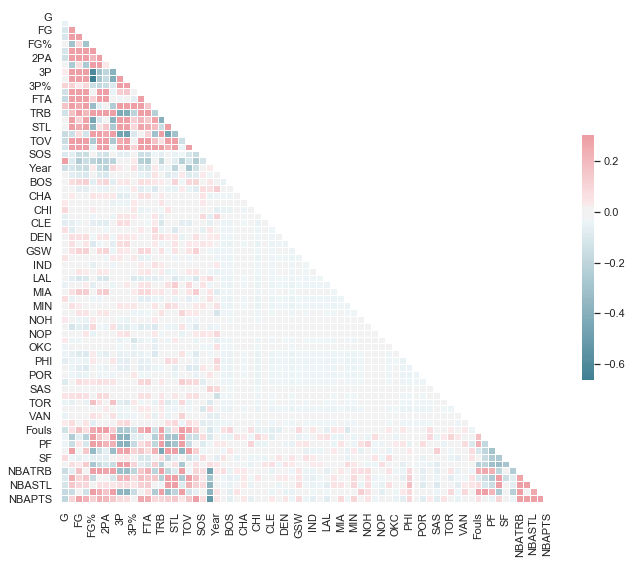

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 27)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 4 1 1 1]


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([0.02639107, 0.02280796, 0.02953288, 0.02528272, 0.02371604,
       0.02145294, 0.02224592, 0.02609673, 0.01691843, 0.01601543,
       0.0184737 , 0.01899643, 0.01816565, 0.01941082, 0.0233939 ,
       0.02154739, 0.0267428 , 0.01711463, 0.01773604, 0.0295289 ,
       0.02217772, 0.40602378, 0.0205165 , 0.02615077, 0.01966102,
       0.01584246, 0.01149436, 0.00500743, 0.01682252, 0.01473306])

In [56]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PTS,SOS,Pk,Year,0,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782355,-1.081579,-0.265304,-0.896388,1.900090,0.532753,0.147913,1.365056,-1.353378,-1.396589,...,2.531948,-0.716974,-0.661878,-0.057171,-1.550535,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Stromile Swift,-0.989817,-0.459079,0.276500,-0.358995,1.441185,0.918489,0.532755,1.270929,-1.091713,-1.092955,...,2.677441,0.560722,-0.018668,-0.290328,-1.488428,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Marcus Fizer,0.272184,0.893249,1.824514,1.396491,0.576324,2.461433,2.585246,0.122573,-1.091713,-1.092955,...,0.204057,0.276789,1.455357,-0.166554,-1.364213,-1.748342,1.926424,-0.337395,-0.555556,-0.599145
Mike Miller,-0.587051,-0.437613,-0.187903,-0.287342,0.082118,-0.315867,-0.579011,0.894419,0.216615,0.324004,...,-0.668903,0.134823,-0.045468,0.063725,-1.302106,-1.748342,-0.519096,-0.337395,-0.555556,-0.599145
DerMarr Johnson,-1.473137,-0.265889,-0.265304,-0.287342,-0.006133,-0.701603,-1.006614,1.082674,0.739946,0.779455,...,0.204057,-1.000906,-0.233071,0.475347,-1.239998,-1.748342,-0.519096,-0.337395,-0.555556,-0.599145


## Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-1.96777546e-02, -2.72082732e-01,  9.57247543e-01, -1.77929724e+00,
        8.73234431e-02,  1.13866460e-01,  1.52593850e+00,  6.90949614e-02,
        4.12554822e-01,  1.37807333e+00, -9.25432872e-03,  3.90626701e-01,
        1.42509509e-01,  1.75191501e-02,  1.46320222e-01,  2.04748377e-01,
        4.23692551e-02,  2.96566591e-03, -3.51724526e-02, -1.43498288e+00,
        1.90870437e-02, -4.34521965e-01,  8.07943790e-02, -1.71877707e-02,
       -6.28575338e-02,  2.74818474e-02,  2.34156688e-02, -4.32264584e-02,
        2.64647936e-02, -2.48863896e-02, -2.62143068e-03,  1.74006846e-03,
        2.10613722e-02, -3.83485032e-03,  9.58562805e-02, -2.78480037e-02,
       -6.03941040e-02,  2.41528996e-02, -2.12676347e-02, -2.89535611e-02,
        8.85762464e-02,  8.27970837e-03,  6.61449574e-02,  1.33756205e-02,
        4.81859321e-02, -4.61223560e-02,  1.94289029e-15,  1.74221772e-02,
       -6.13456133e-02, -5.92968112e-02,  6.70237205e-02, -3.73275929e-02,
       -3.32445769e-02, -

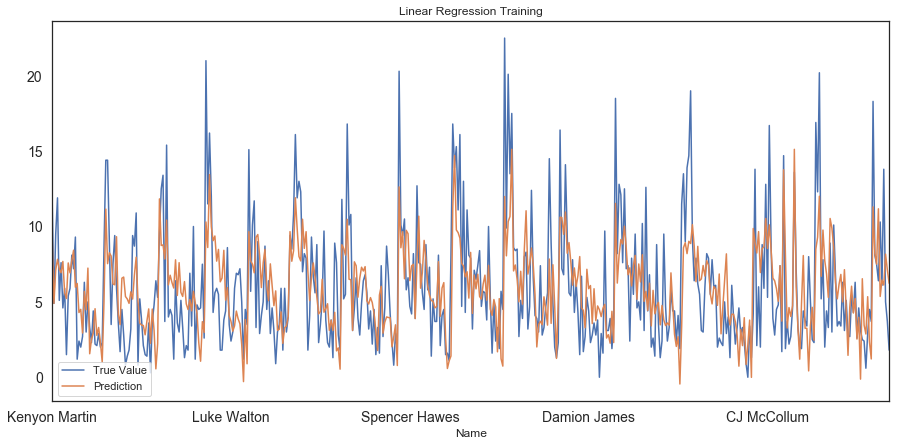

adj train r^2 = 0.3416185917138116
train mse = 9.425686679290372


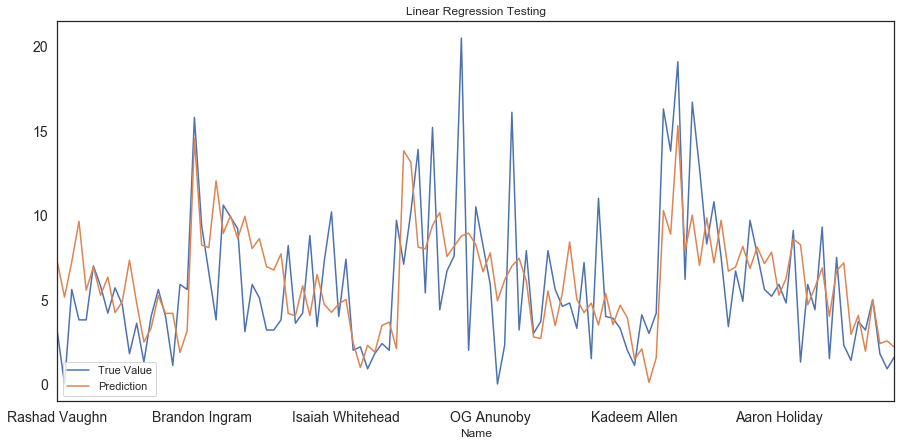

adj test r^2 = 0.14160343398223274
test mse = 12.398724627673202


In [146]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

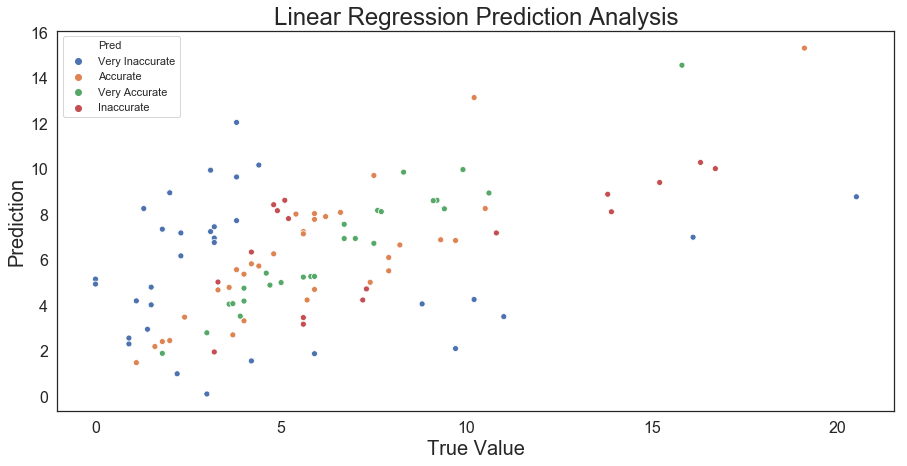

This model is able to relatively accurately predict 28.21% of NBA Rookies.
This model is able to very accurately predict 22.22% of NBA Rookies.


In [147]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Extra Trees

In [148]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

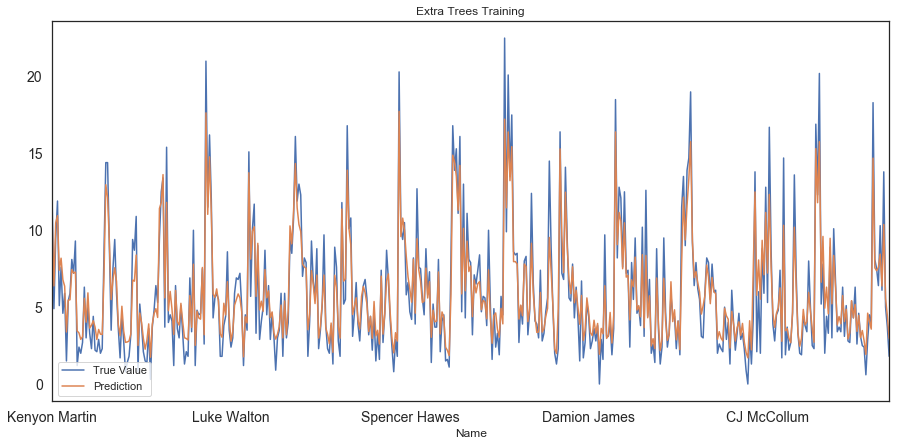

adj train r^2 = 0.8725990260348621
train mse = 1.8239300929801359


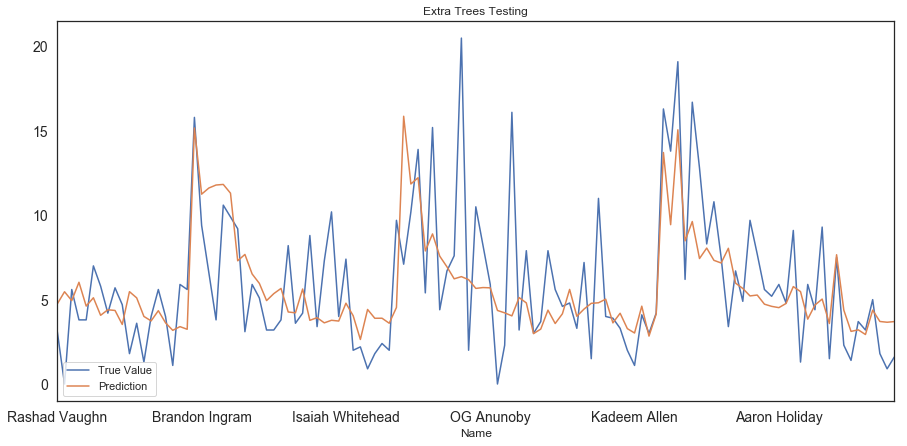

adj test r^2 = 0.23067454144356725
test mse = 11.112176920687016


In [149]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

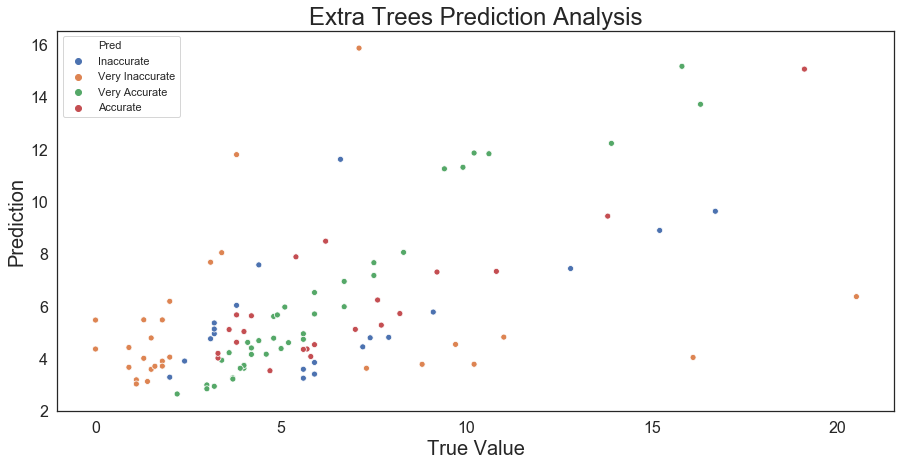

This model is able to relatively accurately predict 18.8% of NBA Rookies.
This model is able to very accurately predict 33.33% of NBA Rookies.


In [150]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Cross Validated Extra Trees

In [151]:
from sklearn.model_selection import cross_val_score
cross = np.split(df3, [66], axis=1)
cross_x=trains[0]
cross_y=trains[1]
cross_val_score(reg, cross_x, cross_y, cv=5, scoring='r2')

array([0.41322158, 0.44637157, 0.47887016, 0.36184442, 0.39317951])

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(7,28,2),
              'min_samples_split': np.arange(2,9),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [153]:
grid.fit(cross_x, cross_y);

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [154]:
grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 4,
 'max_depth': 23,
 'bootstrap': True}

In [155]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=800, max_depth=23, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=23,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

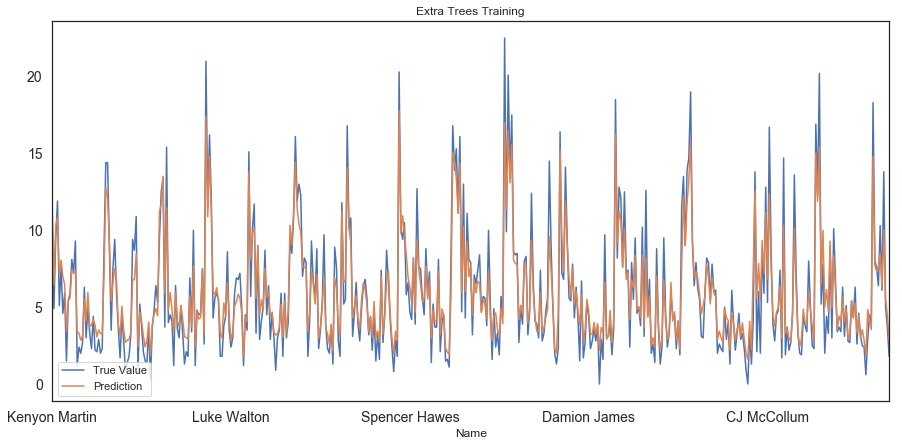

adj train r^2 = 0.8706233327423071
train mse = 1.8522150137200368


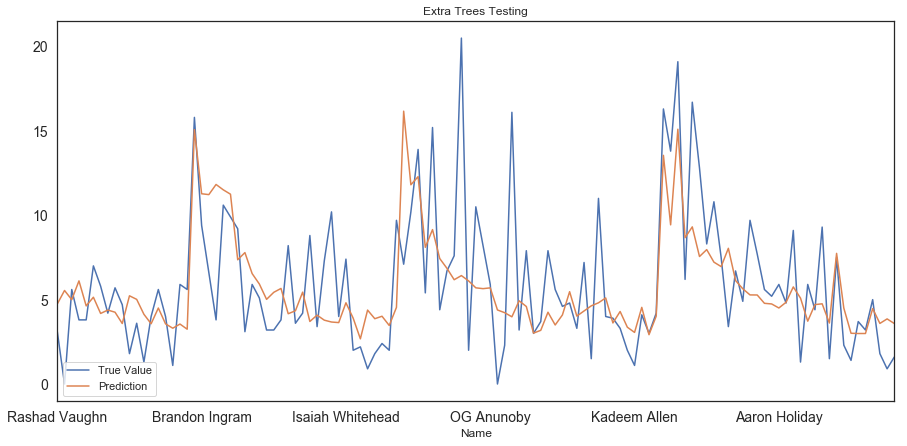

adj test r^2 = 0.2268771472030121
test mse = 11.167026680524453


In [156]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

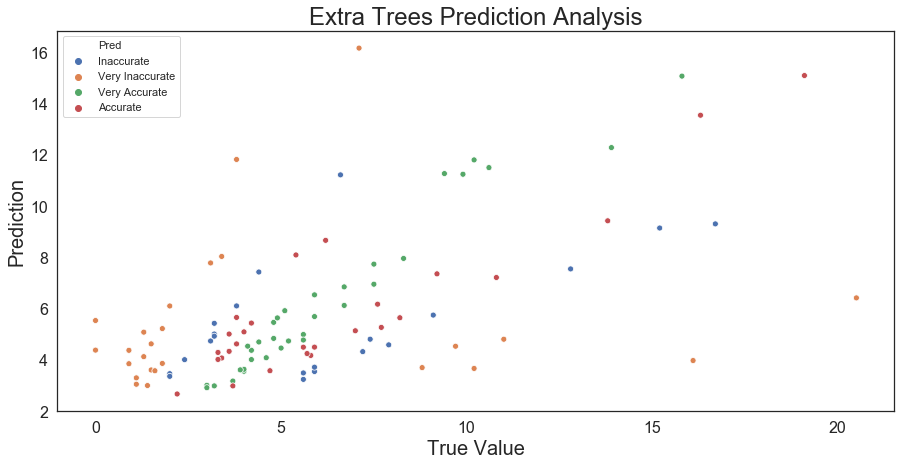

This model is able to relatively accurately predict 23.08% of NBA Rookies.
This model is able to very accurately predict 29.06% of NBA Rookies.


In [157]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Random Forrest

In [158]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

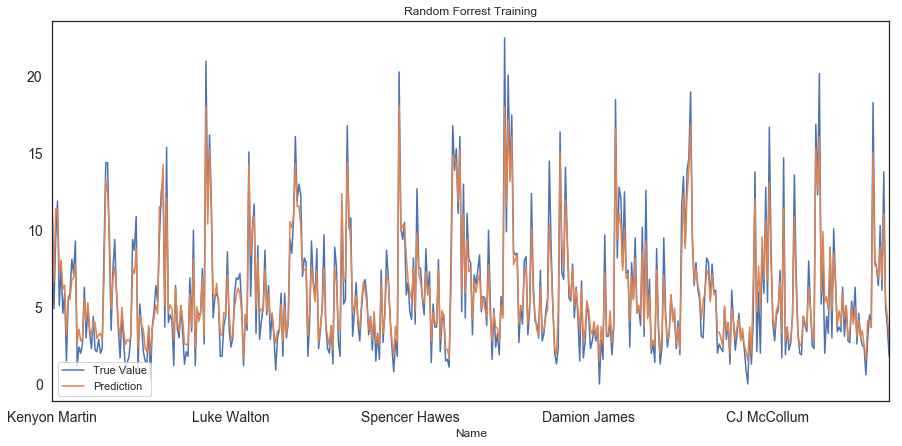

adj train r^2 = 0.9041234466100667
train mse = 1.3726121982942463


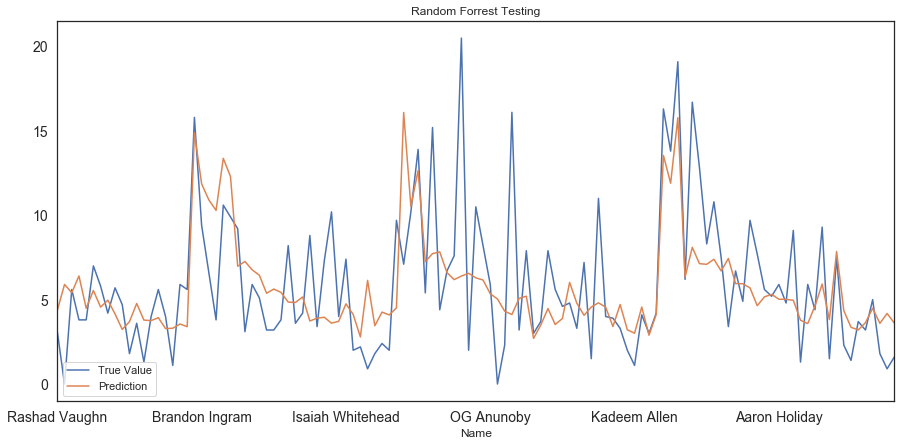

adj test r^2 = 0.23176889858566985
test mse = 11.096369969230764


In [159]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

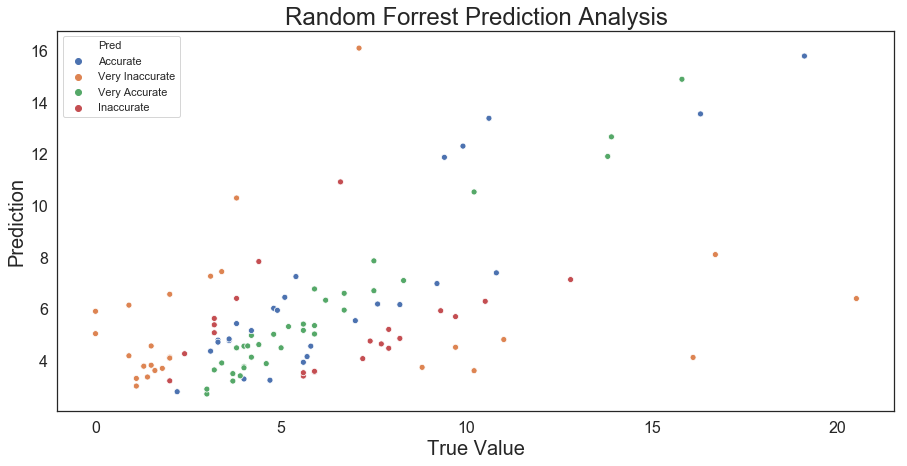

This model is able to relatively accurately predict 23.08% of NBA Rookies.
This model is able to very accurately predict 29.06% of NBA Rookies.


In [160]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## XGBoost

In [161]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [164]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=16, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

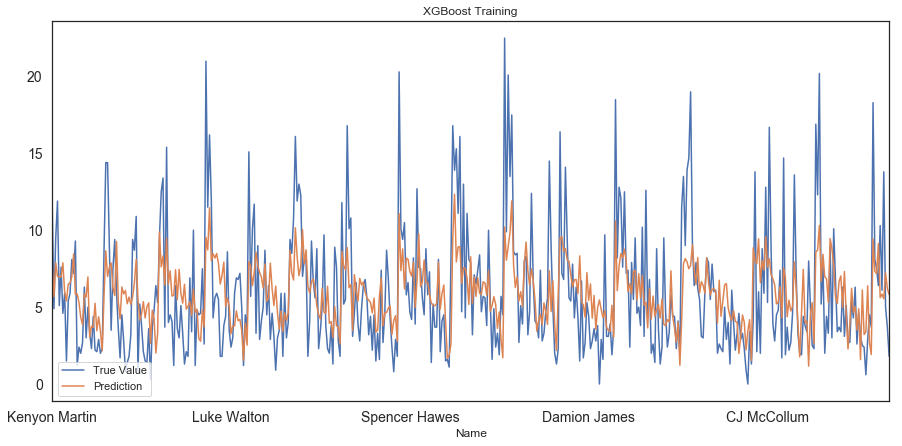

adj train r^2 = 0.2733500669163603
train mse = 10.40304982578802


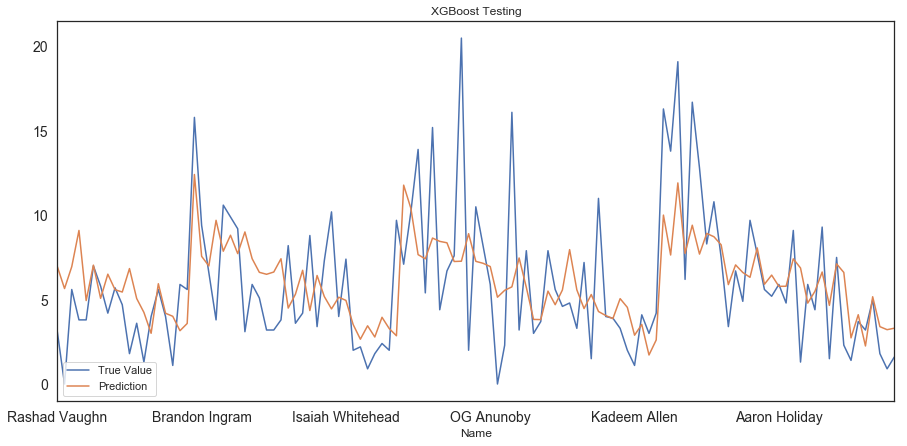

adj test r^2 = 0.17288808873836115
test mse = 11.946847447883746


In [165]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

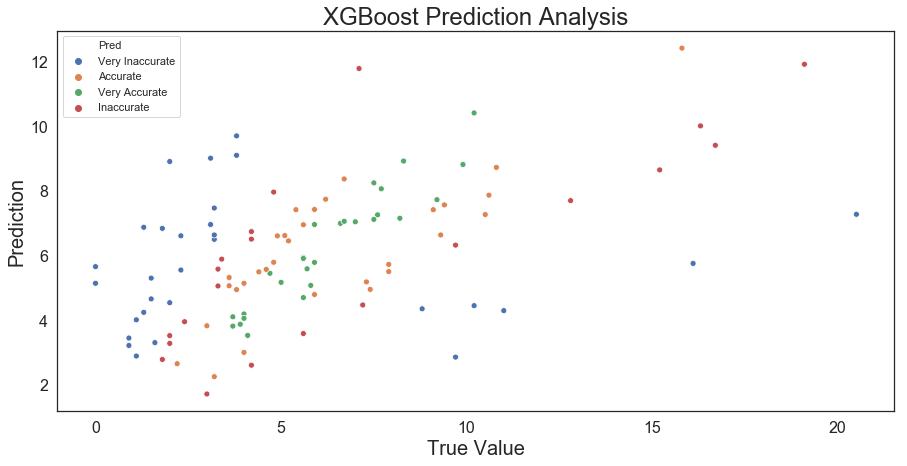

This model is able to relatively accurately predict 26.5% of NBA Rookies.
This model is able to very accurately predict 23.08% of NBA Rookies.


In [166]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Feed Forward Neural Network

In [167]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [169]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=66, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

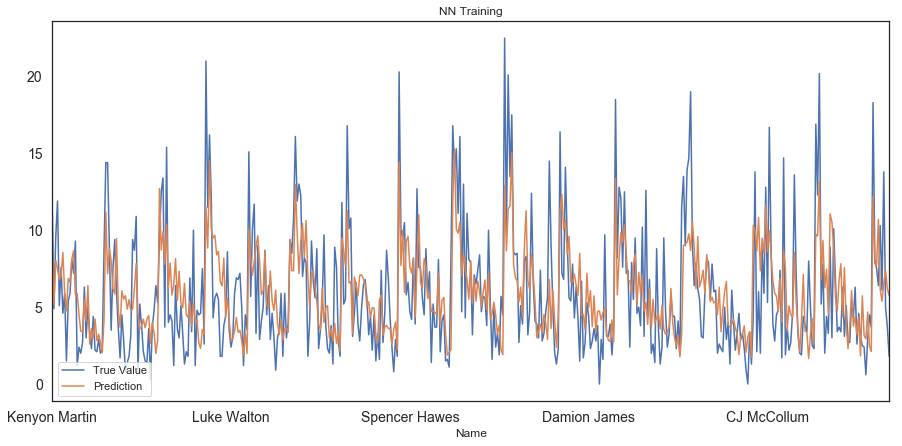

adj train r^2 = 0.3902990701550558
train mse = 8.728754883510282


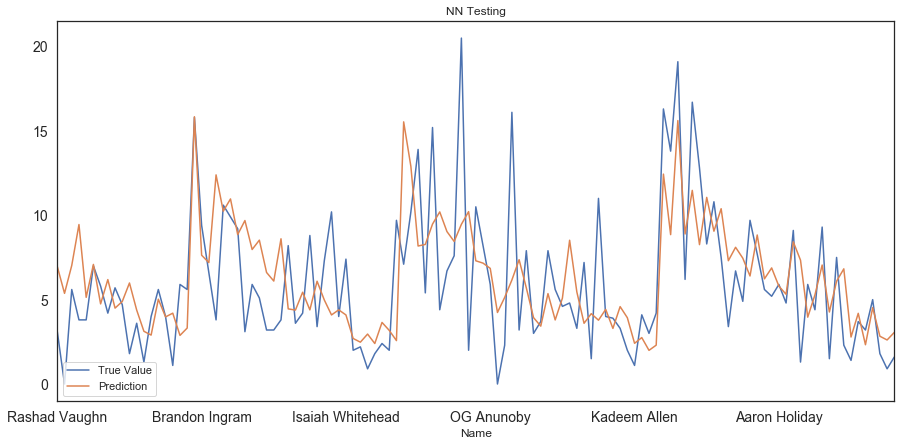

adj test r^2 = 0.18533849001222713
test mse = 11.767013204586576


In [170]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

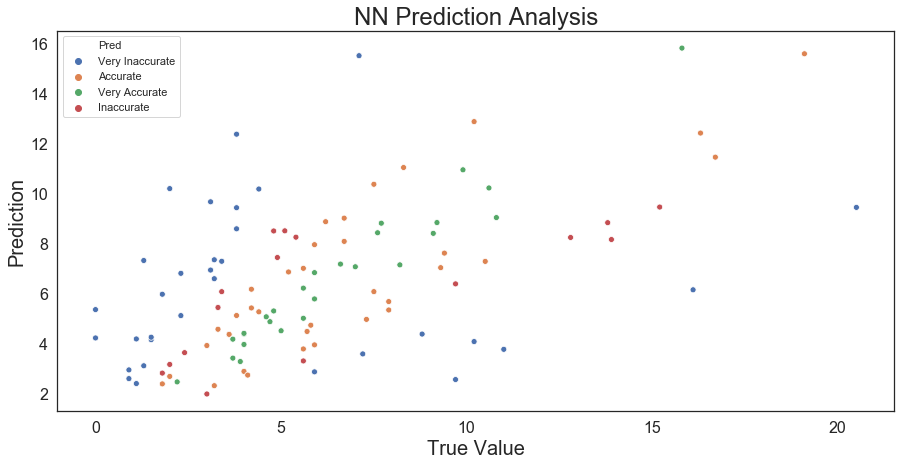

This model is able to relatively accurately predict 30.77% of NBA Rookies.
This model is able to very accurately predict 22.22% of NBA Rookies.


In [171]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [172]:
test_y2[test_y2['NBAPTS']>15]

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred
Name,,,,,,,
Ben Simmons,3.000070,4.917396,3.083109,1.949983,15.8,15.838772,Very Accurate
Lauri Markkanen,2.682521,-0.026541,0.279700,1.020538,15.2,9.476746,Inaccurate
Donovan Mitchell,0.671379,1.739151,2.573398,0.091093,20.5,9.463512,Very Inaccurate
Kyle Kuzma,2.047424,0.397225,0.279700,0.400908,16.1,6.165166,Very Inaccurate
Deandre Ayton,4.164415,0.397225,1.044266,1.949983,16.3,12.438339,Accurate
Trae Young,0.671379,4.846768,1.044266,-0.218722,19.1,15.611717,Accurate
Collin Sexton,0.247981,1.244757,0.024844,-0.528536,16.7,11.474104,Accurate


## LSTM

In [173]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [174]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(200, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh', recurrent_regularizer=regularizers.l2(0.03), activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(200, activation='tanh'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=100, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Restoring model weights from the end of the best epoch
Epoch 00084: early stopping


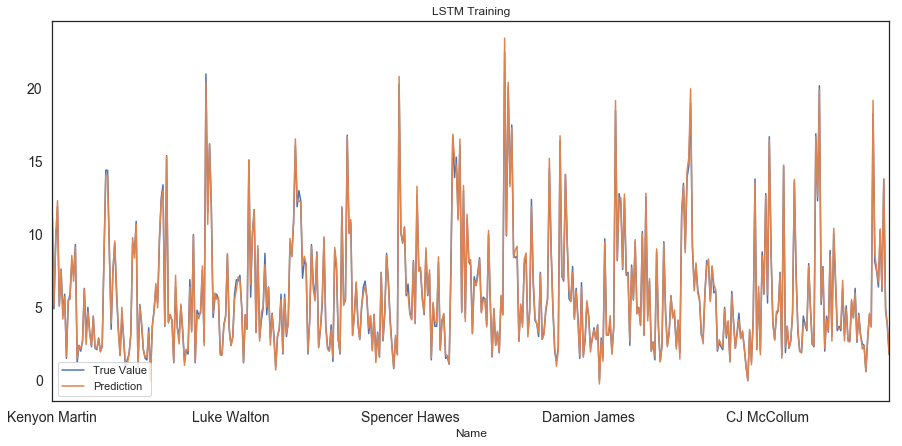

adj train r^2 = 0.9947827223774136
train mse = 0.07469291138913202


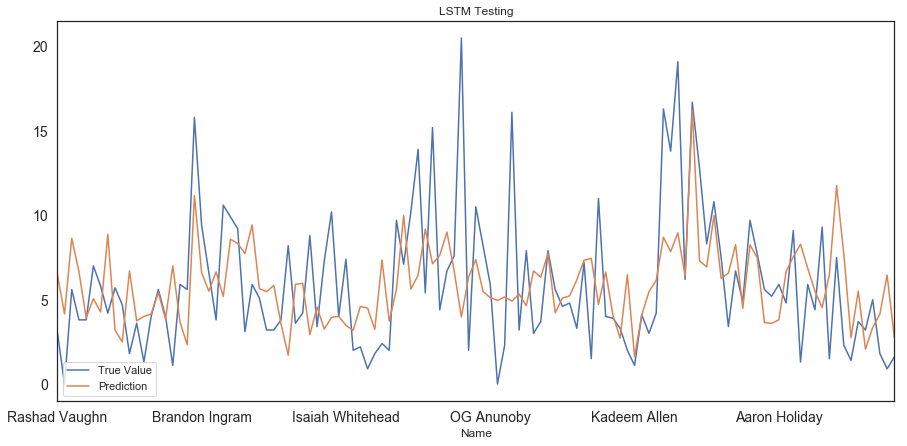

adj test r^2 = -0.04725756069107412
test mse = 15.126642653634086


In [175]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

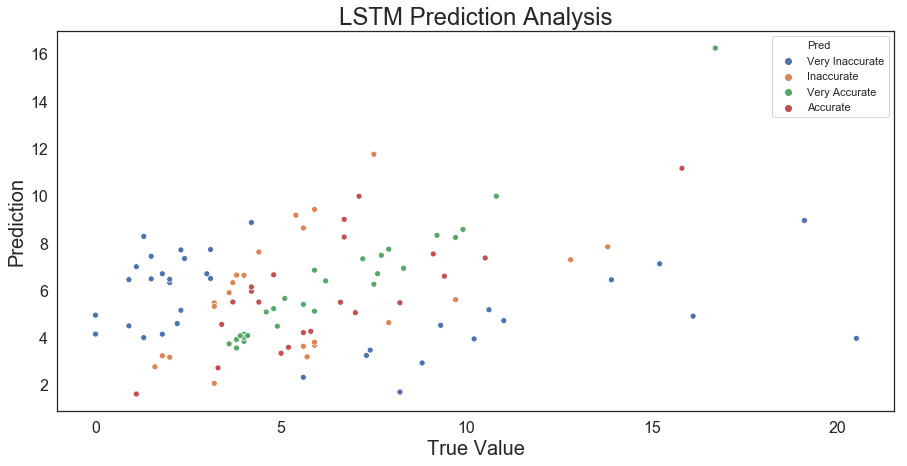

This model is able to relatively accurately predict 18.8% of NBA Rookies.
This model is able to very accurately predict 23.08% of NBA Rookies.


In [176]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## TPOT

In [177]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



1.0011999833333334 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LassoLarsCV(DecisionTreeRegressor(SelectPercentile(SelectPercentile(input_matrix, percentile=18), percentile=18), max_depth=3, min_samples_leaf=7, min_samples_split=18), normalize=False)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

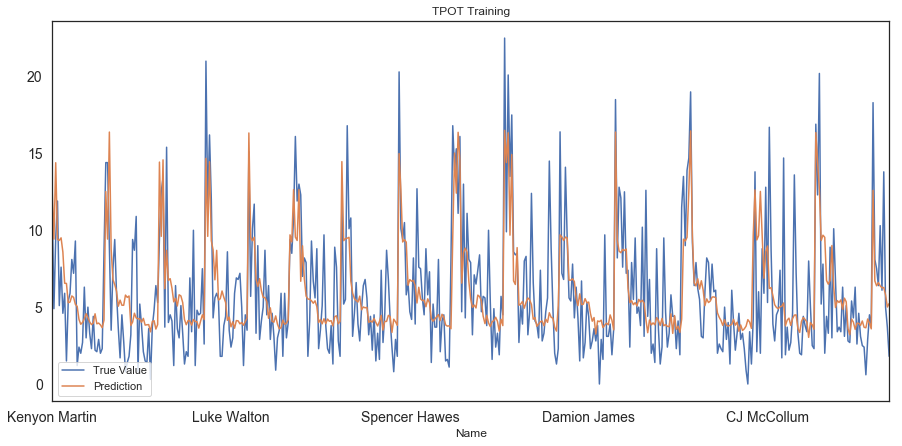

adj train r^2 = 0.41019650749550995
train mse = 8.443894151218144


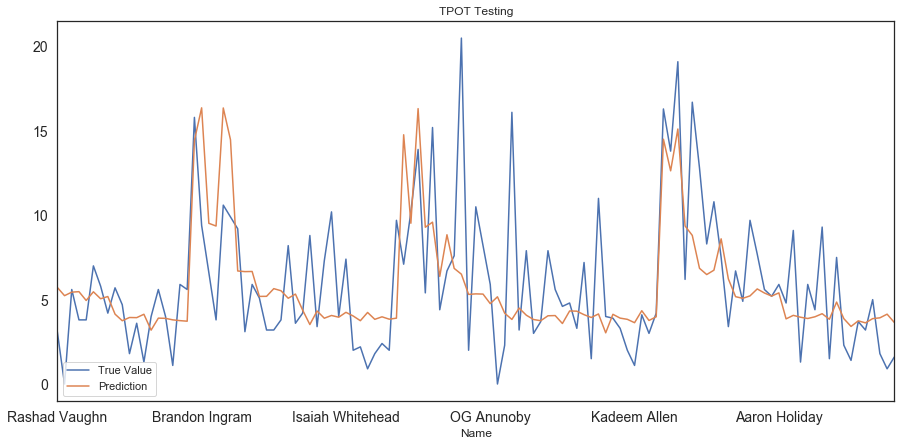

adj test r^2 = 0.19600711071425814
test mse = 11.612915092503913


In [178]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

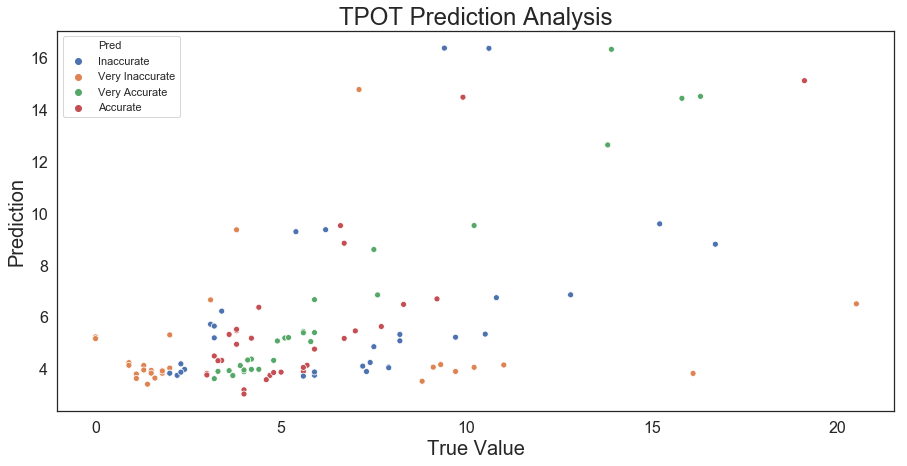

This model is able to relatively accurately predict 25.64% of NBA Rookies.
This model is able to very accurately predict 23.93% of NBA Rookies.


In [184]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Differences

In [185]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Chandler Hutchison,0.936003,-0.309052,0.024844,-0.528536,5.2,5.209399,Very Accurate,0.009399
Patrick McCaw,-0.545891,-0.097169,0.024844,-0.218722,4.0,3.958765,Very Accurate,0.041235
Hamidou Diallo,-0.281267,-0.662190,-0.230011,-0.218722,3.7,3.742726,Very Accurate,0.042726
Wesley Iwundu,-0.122493,-0.238424,0.024844,-0.218722,3.7,3.749976,Very Accurate,0.049976
Denzel Valentine,0.089207,-0.097169,0.024844,-0.528536,5.1,5.191564,Very Accurate,0.091564


In [186]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Donovan Mitchell,0.671379,1.739151,2.573398,0.091093,20.5,6.507670,Very Inaccurate,13.992330
Kyle Kuzma,2.047424,0.397225,0.279700,0.400908,16.1,3.825858,Very Inaccurate,12.274142
Collin Sexton,0.247981,1.244757,0.024844,-0.528536,16.7,8.806607,Inaccurate,7.893393
Markelle Fultz,0.353830,1.809778,1.044266,0.091093,7.1,14.770063,Very Inaccurate,7.670063
Brandon Ingram,0.830154,0.609108,0.279700,0.710723,9.4,16.366225,Inaccurate,6.966225


## 2019 Predictions

In [187]:
train=df3
test=df4
trains = np.split(train, [66], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [66], axis=1)
test_x=tests[0]
test_y=tests[1]

In [188]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
RJ Barrett,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
DeAndre Hunter,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
Darius Garland,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104
Jarrett Culver,-1.286838,-0.874073,-1.249433,-0.838351,-1.29104


In [189]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 66)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,66):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=66, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

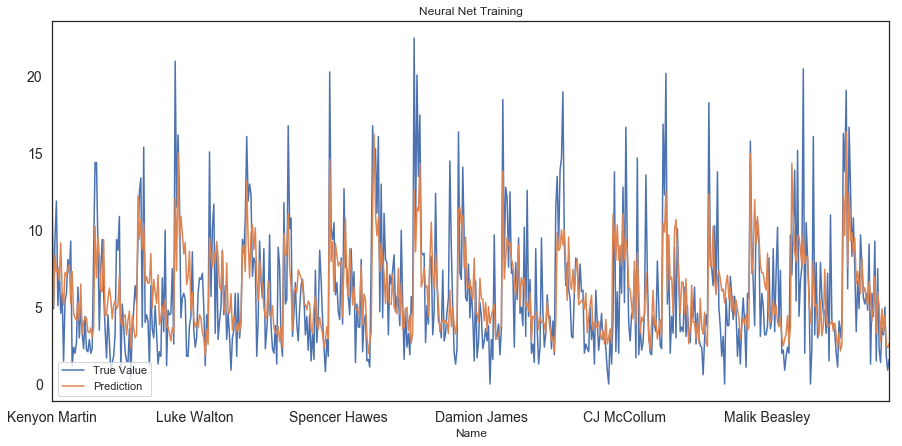

adj train r^2 = 0.4144911821843167
train mse = 8.673060592838613


In [190]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

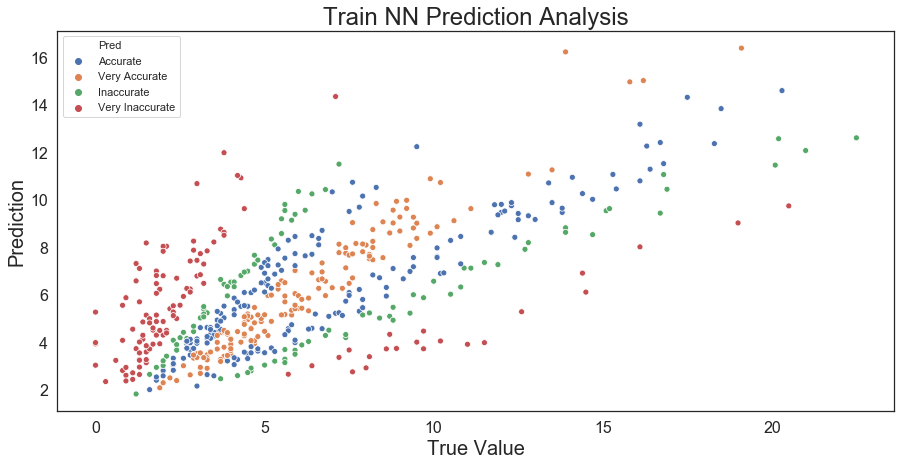

This model is able to relatively accurately predict 30.55% of NBA Rookies.
This model is able to very accurately predict 26.45% of NBA Rookies.


In [191]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [192]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

In [193]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,7.004575,1.412093,0.980967,0.553837,14.599770,29.727810
Ja Morant,3.964555,6.062637,0.640339,0.372281,11.610123,28.499403
RJ Barrett,4.406283,3.275454,0.742288,0.185560,14.729853,27.714117
Coby White,2.551719,4.100890,0.836428,0.213006,11.872848,24.234550
Darius Garland,2.700758,3.862124,0.780619,0.234783,11.773418,23.853718
Jaxson Hayes,5.961573,0.813340,0.745777,0.901799,9.490907,22.807535
Jarrett Culver,3.113495,1.845928,0.729628,0.297363,10.403223,19.989283
Cameron Johnson,4.232372,1.361936,0.778374,0.547343,8.431475,19.530376
Nickeil Alexander-Walker,2.937909,1.418200,0.720512,0.345227,10.332056,19.182064


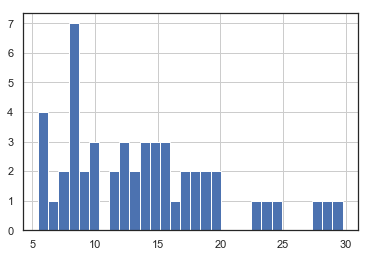

Value Distribution in Draft


In [194]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [195]:
test_y2['NBAPTS'].mean()

6.308316707611084

In [196]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Admiral Schofield,2.38,0.66,0.48,0.15,4.41,10.160000
Bol Bol,3.68,0.53,0.31,0.84,5.61,14.260000
Brandon Clarke,4.74,0.68,0.48,0.89,6.72,17.549999
Bruno Fernando,4.49,0.77,0.47,0.77,5.87,16.150000
Cam Reddish,2.31,1.15,0.59,0.28,7.42,14.540000


In [197]:
dfn = pd.read_csv('CollegeRookieStatLog5.csv')
dfn = dfn[['Name','Pos']]
finaly = test_y2.merge(dfn, left_on='Name', right_on='Name')
finaly.head()

,Name,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value,Pos
0,Admiral Schofield,2.38,0.66,0.48,0.15,4.41,10.160000,SF
1,Bol Bol,3.68,0.53,0.31,0.84,5.61,14.260000,C
2,Brandon Clarke,4.74,0.68,0.48,0.89,6.72,17.549999,PF
3,Bruno Fernando,4.49,0.77,0.47,0.77,5.87,16.150000,C
4,Cam Reddish,2.31,1.15,0.59,0.28,7.42,14.540000,SG


In [198]:
finaly.to_csv('NewRookiePredictions5.csv')

## Draft Night vs Results

In [199]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions5.csv')

In [200]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [201]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
1,Ja Morant,6-3,175,PG,Murray St.,19
4,Darius Garland,6-2,175,PG,Vanderbilt,19
6,Coby White,6-5,190,PG,North Carolina,19
23,Ty Jerome,6-5,195,PG,Virginia,21
27,Jordan Poole,6-5,190,PG,Michigan,20
32,Carsen Edwards,6-0,200,PG,Purdue,21
42,Jaylen Nowell,6-4,200,PG,Washington,19
50,Tremont Waters,5-11,175,PG,LSU,21
52,Justin Wright-Foreman,6-2,190,PG,Hofstra,21
54,Kyle Guy,6-2,170,PG,Virginia,21


In [202]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
2,RJ Barrett,6-7,210,SG,Duke,19
5,Jarrett Culver,6-6,195,SG,Texas Tech,20
9,Cameron Reddish,6-8,210,SG,Duke,19
12,Tyler Herro,6-6,195,SG,Kentucky,19
13,Romeo Langford,6-6,210,SG,Indiana,19
16,Nickeil Alexander-Walker,6-5,205,SG,Virginia Tech,20
19,Matisse Thybulle,6-6,200,SG,Washington,22
25,Dylan Windler,6-7,195,SG,Belmont,22
28,Keldon Johnson,6-6,215,SG,Kentucky,19
29,Kevin Porter,6-5,215,SG,USC,19


In [203]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
3,DeAndre Hunter,6-7,225,SF,Virginia,21
8,Rui Hachimura,6-8,235,SF,Gonzaga,21
10,Cameron Johnson,6-8,205,SF,North Carolina,23
14,Sekou Doumbouya,6-9,230,SF,France,18
15,Chuma Okeke,6-8,235,SF,Auburn,20
22,Darius Bazley,6-9,210,SF,USA,19
24,Nassir Little,6-6,225,SF,North Carolina,19
36,Deividas Sirvydis,6-8,195,SF,Lithuania,19
41,Admiral Schofield,6-5,240,SF,Tennessee,22
44,Isaiah Roby,6-8,215,SF,Nebraska,21


In [204]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
0,Zion Williamson,6-6,280,PF,Duke,18
7,Jaxson Hayes,6-11,220,PF,Texas,19
11,PJ Washington,6-8,230,PF,Kentucky,20
18,Luka Samanic,6-11,230,PF,Croatia,19
20,Brandon Clarke,6-8,210,PF,Gonzaga,22
21,Grant Williams,6-7,240,PF,Tennessee,20
26,Mfiondu Kabengele,6-10,255,PF,Florida St.,21
30,Nicolas Claxton,6-11,215,PF,Georgia,20
37,Daniel Gafford,6-10,240,PF,Arkansas,20
38,Alen Smailagic,6-10,215,PF,Serbia,18


In [205]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Centers: Name height weight pos col age 
 
 17 
 Goga Bitadze 
 6-11 
 250 
 C 
 Rep. of Georgia 
 19 
 
 
 33 
 Bruno Fernando 
 6-10 
 240 
 C 
 Maryland 
 20 
 
 
 43 
 Bol Bol 
 7-2 
 210 
 C 
 Oregon 
 19 
 
 
 58 
 Dewan Hernandez 
 6-10 
 235 
 C 
 Miami 
 22 
 
 Power Ranking Centers: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 14 
 Bruno Fernando 
 4.49 
 0.77 
 0.47 
 0.77 
 5.87 
 16.15 
 C 
 
 
 22 
 Bol Bol 
 3.68 
 0.53 
 0.31 
 0.84 
 5.61 
 14.26 
 C

## Added Value

In [206]:
dfm = pd.read_csv('fixlater2.csv')
dfm = dfm[['Name','Pk','Tm']]
finaly = dfo.merge(dfm, left_on='Name', right_on='Name')
finaly.Tm = finaly.Tm.str[:-4]
finaly = finaly.sort_values('Pk', ascending=True)
finaly.head()

,Name,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value,Pos,Pk,Tm
0,Zion Williamson,7.00,1.41,0.98,0.55,14.60,29.73,PF,1,Pelicans
1,Ja Morant,3.96,6.06,0.64,0.37,11.61,28.50,PG,2,Grizzlies
2,RJ Barrett,4.41,3.28,0.74,0.19,14.73,27.71,SG,3,Knicks
17,DeAndre Hunter,2.94,1.24,0.68,0.34,7.29,15.75,SF,4,Hawks
4,Darius Garland,2.70,3.86,0.78,0.23,11.77,23.85,PG,5,Cavaliers


In [207]:
finaly['diff'] = finaly.sort_values('Pk', ascending=True)['Value'].values - finaly.sort_values('Value', ascending=False)['Value'].values

In [208]:
finaly.head()

,Name,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value,Pos,Pk,Tm,diff
0,Zion Williamson,7.00,1.41,0.98,0.55,14.60,29.73,PF,1,Pelicans,0.00
1,Ja Morant,3.96,6.06,0.64,0.37,11.61,28.50,PG,2,Grizzlies,0.00
2,RJ Barrett,4.41,3.28,0.74,0.19,14.73,27.71,SG,3,Knicks,0.00
17,DeAndre Hunter,2.94,1.24,0.68,0.34,7.29,15.75,SF,4,Hawks,-8.48
4,Darius Garland,2.70,3.86,0.78,0.23,11.77,23.85,PG,5,Cavaliers,0.00


In [209]:
teams = finaly.Tm.unique()
av = []
for t in teams:
    av.append(t)
    finaly2 = finaly[finaly['Tm']==t]
    av.append(finaly2['NBAPTS'].sum())
    av.append(finaly2['NBAAST'].sum())
    av.append(finaly2['NBATRB'].sum())
    av.append(finaly2['NBASTL'].sum())
    av.append(finaly2['NBABLK'].sum())
    av.append(finaly2['Value'].sum())
    av.append(finaly2['diff'].sum())
    av.append(len(finaly2))
av2 = np.array(av)
refined = np.reshape(av2, (-1, 9))
teamdf = pd.DataFrame(refined, columns=['Team','Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num'])
cols=['Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num']
for col in cols:
    teamdf[col] = pd.to_numeric(teamdf[col], errors='coerce')

In [210]:
teamdf = teamdf.set_index('Team')
df1_styler = teamdf[['Points']].sort_values('Points', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Scoring:')
df2_styler = teamdf[['Assists']].sort_values('Assists', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Passing:')
df3_styler = teamdf[['Rebounds']].sort_values('Rebounds', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Rebounding:')
df4_styler = teamdf[['Steals']].sort_values('Steals', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Stealing:')
df5_styler = teamdf[['Blocks']].sort_values('Blocks', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Blocking:')
display_html(df1_styler._repr_html_()+' '+df2_styler._repr_html_()+' '+df3_styler._repr_html_()+' '+df4_styler._repr_html_()+' '+df5_styler._repr_html_(), raw=True)

,Points
Team,
Pelicans,34.42
Celtics,23.01
Cavaliers,22.5
Hawks,20.58
76ers,20.21
Grizzlies,18.33
Knicks,18.33
Bulls,17.23
Clippers,15.9


In [211]:
df1_styler = teamdf[['Value']].sort_values('Value', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Value:')
df2_styler = teamdf[['Grade']].sort_values('Grade', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Grade:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

,Value
Team,
Pelicans,71.72
Cavaliers,49.77
Celtics,49.5
76ers,47.26
Hawks,46.44
Grizzlies,46.05
Bulls,38.47
Knicks,35.21
Hornets,34.41


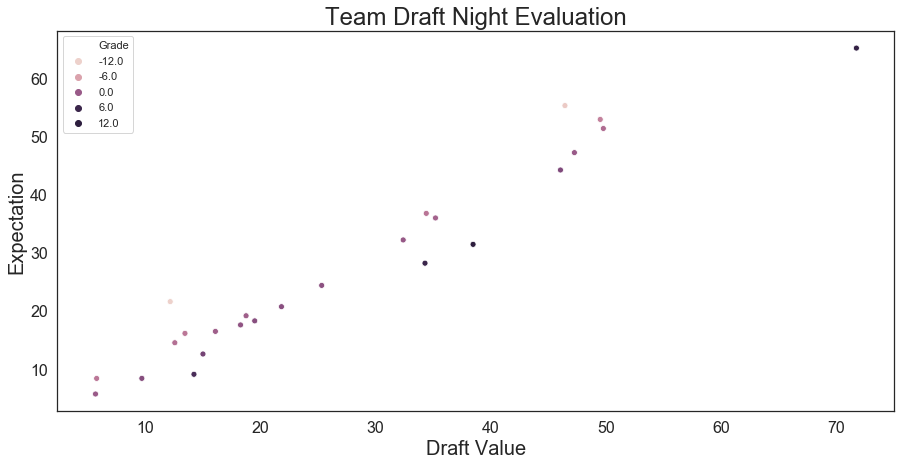

In [212]:
teamdf['Exp'] = teamdf['Value'] - teamdf['Grade']
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="Value", y="Exp", hue="Grade", data=teamdf)
ax.set_title("Team Draft Night Evaluation", fontsize=24)
ax.set_xlabel("Draft Value",fontsize=20)
ax.set_ylabel("Expectation",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()